We hypothesise that there will be two significant peaks in the greyscale intesity of the CT scans, due to edge effects: these will be at the boundary between air and the cementum, and at the cementum-dentine boundary.

To check this we will find 4 random images from 4 teeth, straighten them and plot the greyscale intensity along each row. Hopefully we will see these two peaks.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Choose images

"""
import os
import numpy as np

rng = np.random.default_rng(seed=0)

# Pick four numbers for each tooth
n_slices = 4
n_teeth = 3
indices = [
    *rng.integers(0, 108, n_slices),
    *rng.integers(108, 216, n_slices),
    *rng.integers(216, 316, n_slices),
    # *rng.integers(316, 515, 4), Not using this one for now, since the edge detection doesn't work for it
]
assert len(indices) == n_slices * n_teeth

# Find the corresponding filepaths
img_paths = [f"data/original cut/{i:04d}.tif" for i in indices]
mask_paths = [f"data/masks cut/{i:04d}.tif" for i in indices]

for path in img_paths:
    assert os.path.exists(path), path

for path in mask_paths:
    assert os.path.exists(path), path

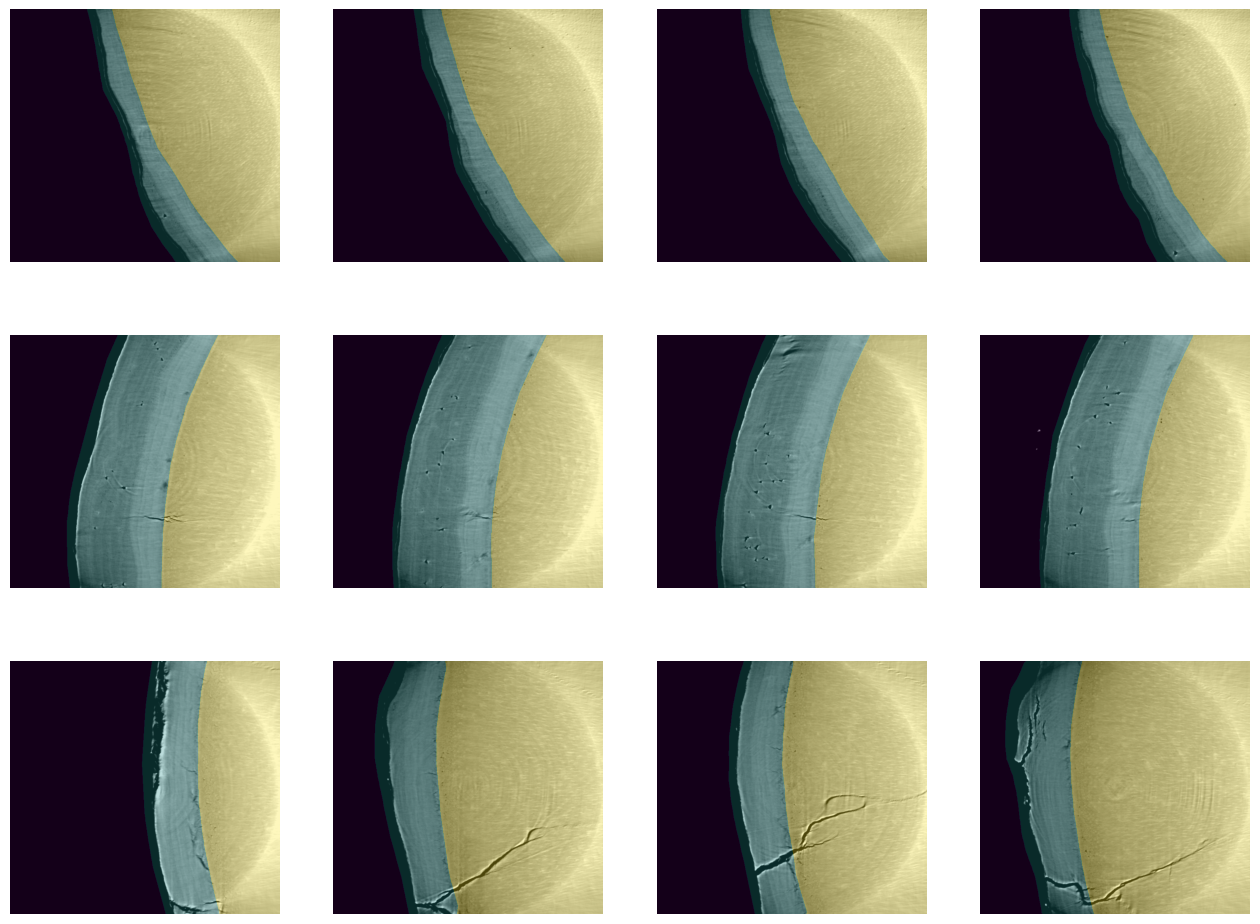

In [3]:
"""
Display them

"""
import matplotlib.pyplot as plt

fig, axes = plt.subplots(n_teeth, n_slices, figsize=(4 * n_slices, 4 * n_teeth))

for axis, img, mask in zip(axes.flat, img_paths, mask_paths):
    axis.imshow(plt.imread(img), cmap="gray")
    axis.imshow(plt.imread(mask), alpha=0.3)

    axis.set_axis_off()

100%|██████████| 12/12 [00:09<00:00,  1.21it/s]


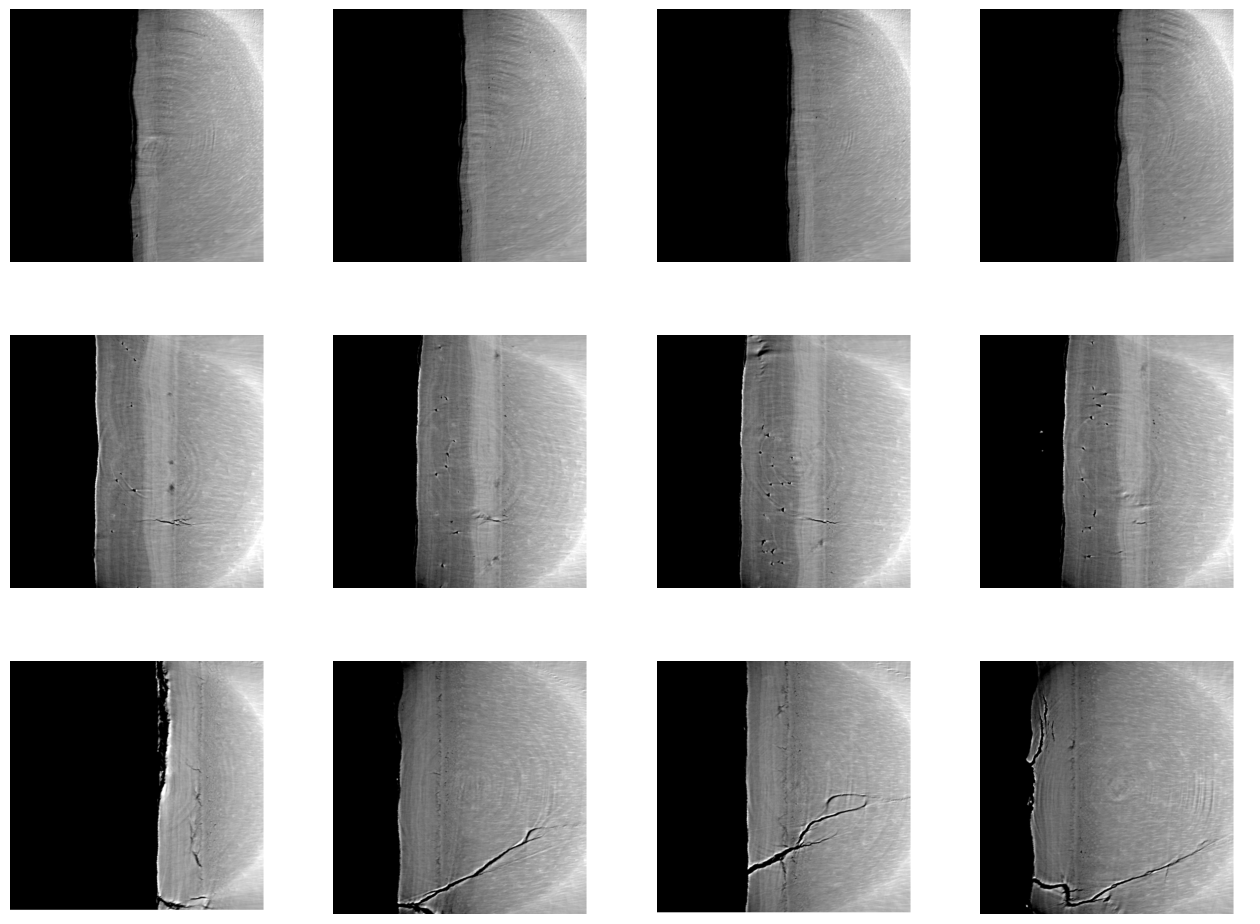

In [4]:
"""
Straighten these images according the the masks

"""
from tqdm import tqdm

from cementum import straighten

n_y = 20
n_left, n_x, n_right = 5, 5, 5

fig, axes = plt.subplots(n_teeth, n_slices, figsize=(4 * n_slices, 4 * n_teeth))

straight_images = []

for axis, img_path, mask_path in tqdm(
    zip(axes.flat, img_paths, mask_paths), total=len(img_paths)
):
    # Define two grids of points that will we use to perform our straightening
    mask = plt.imread(mask_path)
    curve_pts = straighten.mask_mesh(mask, n_y, (n_left, n_x, n_right))
    straight_pts = straighten.straight_mesh(mask, n_y, (n_left, n_x, n_right))

    # Straighten the image
    img = plt.imread(img_path)
    straight_images.append(
        straighten.apply_transformation(img, curve_pts, straight_pts)
    )

    # Display it
    axis.imshow(straight_images[-1], cmap="gray")
    axis.set_axis_off()

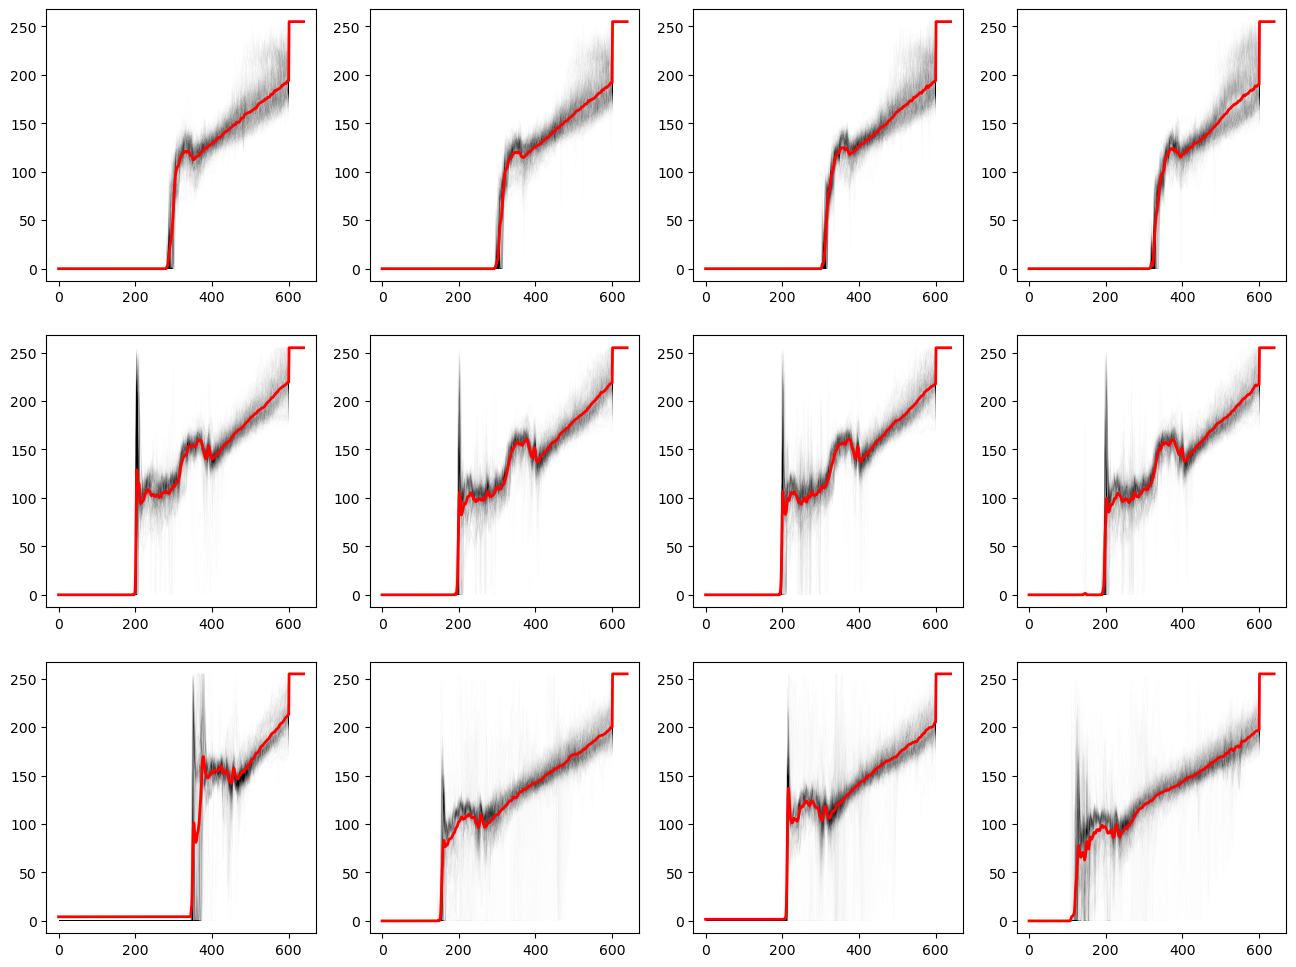

In [5]:
"""
Plot the greyscale intensity across each row for all of these images

"""
fig, axes = plt.subplots(n_teeth, n_slices, figsize=(4 * n_slices, 4 * n_teeth))

for axis, img in zip(axes.flat, straight_images):
    for row in img:
        axis.plot(row, alpha=0.05, linewidth=0.05, color="k")
    axis.plot(np.mean(img, axis=0), color="r", linewidth=2)

In some of the samples, these two peaks are very clear - in the first it can't really be seen at all.

The edge detection code had trouble with the fourth sample - none of the scans only contained two edges - so I've left them out for now

In [6]:
"""
Try to fit the intensity profiles

"""

'\nTry to fit the intensity profiles\n\n'